In [1]:
import csv
import matplotlib.pyplot as pyplot
import math
from matplotlib.collections import BrokenBarHCollection
import pandas as pd

In [2]:
#The data is in the form column 1-5/6 are metadata, columns 5/6+ have information stored about regulation in the form
#column A = genename and column B = type of regulation. Therefore, each row varies in size from 7 colums to over 15
#depending on the interaction. This code uses these properties to cleanly derive these 2-pairs of (gene, regulation) 
#which can then be easily "filtered" based on our desired interactions i.e this code is cleaning code
a,b,c,d,e,f = 0,0,0,0,0,0
number = -3
master = []
types= []
#with open('/Users/pranjal/Desktop/Programming/GenomePlot/C. Elegans/C. Elegans/All Data/interactions.txt, 'r') as tsvfile:
    #writer = csv.reader(tsvfile, delimiter='\t')
    #next(writer)
    #for row in writer:
        #x = int(math.ceil(len(row)/3))-2
        #for i in range(0,x):
            #num1 = number*i-2
            #num2 = number*i-1
            #master.append((row[num1],row[num2]))
with open('../Intermediate Files/enhancer.txt', 'r') as tsvfile:
    writer = csv.reader(tsvfile, delimiter='\t')
    for row in writer:
        try:
            geneid = row[8].split("=")[1]
        except:
            continue
        master.append(geneid)

with open('../Intermediate Files/promoter.txt', 'r') as tsvfile:
    writer = csv.reader(tsvfile, delimiter='\t')
    for row in writer:
        try:
            geneid = row[8].split("=")[1]
        except:
            continue
        master.append(geneid)
masterfinal = list(set(master))
print(len(masterfinal))

3298


In [3]:
convert = []
with open('../Data File(s): Genes and Regulation/SFtogene.txt', 'r') as tsvfile2:
    writer2 = csv.reader(tsvfile2, delimiter='\t')
    for row2 in writer2:
        convert.append((row2[0],row2[1]))
print(len(convert))

finallist = []
for item in convert:
    if item[0] in masterfinal:
        finallist.append(item[1])    
print(len(finallist))
finallist2 = list(set(finallist))
print(len(finallist2))

99300
3208
2277


In [8]:
same = []
same1 =[]
nonreg = []
#This code cross references. The dataset here contains the data of genetic loci. allgenesgreen ends up with all trans
#information, allgenesblue with all cis information. 
allgenesgreen = [[],[],[],[],[],[]]
allgenesblue = [[],[],[],[],[],[]]
a = 0
b = 0
#sum1, sum2, sum3, sum4, sum5, sum6, sum21, sum22, sum23, sum24, sum25, sum26 = 0,0,0,0,0,0,0,0,0,0,0,0
notsame = []
allgenes = [[],[],[],[],[],[]]
alltransgenes = [[],[],[],[],[],[]]
othergenes = [[],[],[],[],[],[]]
with open('../Data File(s): Genes and Regulation/results.tsv', 'r') as tsvfile2:
    writer = csv.reader(tsvfile2, delimiter='\t')
    for row in writer:
        b = b+1
        start = int(row[3])
        stop = int(row[4])
        width = (stop-start)
        if row[0] in finallist2:
            a = a+1
            same.append(row[1])
            #same1.append(row[0])
            if row[2] == 'X':
                allgenes[0].append((start,width))
                #sum1 = sum1 + width
            elif row[2] == 'I':
                allgenes[1].append((start,width))
                #sum2 = sum2 + width
            elif row[2] == 'II':
                allgenes[2].append((start,width))
                #sum3 = sum3 + width
            elif row[2] == 'III':
                allgenes[3].append((start,width))
                #sum4 = sum4 + width
            elif row[2] == 'IV':
                allgenes[4].append((start,width))
                #sum5 = sum5 + width
            elif row[2] == 'V':
                allgenes[5].append((start,width))
                #sum6 = sum6 + width
                '''
        elif row[1] in allstwo:
            a = a+1
            nonreg.append(row[1])
            same1.append(row[0])
            if row[2] == 'X':
                alltransgenes[0].append((start,width))
                #sum21 = sum21 + width
            elif row[2] == 'I':
                alltransgenes[1].append((start,width))
                #sum22 = sum22 + width
            elif row[2] == 'II':
                alltransgenes[2].append((start,width))
                #sum23 = sum23 + width
            elif row[2] == 'III':
                alltransgenes[3].append((start,width))
                #sum24 = sum24 + width
            elif row[2] == 'IV':
                alltransgenes[4].append((start,width))
                #sum25 = sum25 + width
            elif row[2] == 'V':
                alltransgenes[5].append((start,width))
                #sum26 = sum26 + width
                '''
        else:
            nonreg.append(row[1])
            if row[2] == 'X':
                othergenes[0].append((start,width))
                notsame.append(row[1])
            elif row[2] == 'I':
                othergenes[1].append((start,width))
                notsame.append(row[1])
            elif row[2] == 'II':
                othergenes[2].append((start,width))
                notsame.append(row[1])
            elif row[2] == 'III':
                othergenes[3].append((start,width))
                notsame.append(row[1])
            elif row[2] == 'IV':
                othergenes[4].append((start,width))
                notsame.append(row[1])
            elif row[2] == 'V':
                othergenes[5].append((start,width))
                notsame.append(row[1])

#allgenesgreen[0].append((sum1, sum21))
#allgenesgreen[1].append((sum2, sum22))
#allgenesgreen[2].append((sum3, sum23))
#allgenesgreen[3].append((sum4, sum24))
#allgenesgreen[4].append((sum5, sum25))
#allgenesgreen[5].append((sum6, sum26))

In [10]:
reggenes = pd.DataFrame(same)
nonreggenes = pd.DataFrame(nonreg)

In [ ]:
reggenes.to_csv("celegans_reggenes.csv", header = False, index = False)
nonreggenes.to_csv("celegans_nonreggenes.csv", header = False, index = False)

In [11]:
finaler = []
finaler2 = []

#Gets the list of cis genes that were verified in the database by a curator were added to be cross-referenced.
#If the genes on this list are missing in the main list, they are added.
with open('../Data File(s): Genes and Regulation/cis.txt', 'r') as tsvfile3:
    writer = csv.reader(tsvfile3, delimiter='\t')
    for row in writer:
        finaler2.append(row[0])
        
diff2 = set(finaler2) - set (same1)
print(diff2)

{'WBGene00004364', 'WBGene00002978', 'WBGene00000438', 'WBGene00001578', 'WBGene00001953', 'WBGene00009560', 'WBGene00004056', 'WBGene00006543', 'WBGene00000936', 'WBGene00001500', 'WBGene00016730', 'WBGene00015062', 'WBGene00021395', 'WBGene00003000', 'WBGene00001948', 'WBGene00009133', 'WBGene00003167', 'WBGene00003514', 'WBGene00005441', 'WBGene00001174', 'WBGene00001952', 'WBGene00013748', 'WBGene00006959', 'WBGene00003473', 'WBGene00001186', 'WBGene00003033', 'WBGene00001455', 'WBGene00003026', 'WBGene00002173', 'WBGene00004020', 'WBGene00006654', 'WBGene00000423', 'WBGene00000149', 'WBGene00003474', 'WBGene00002081', 'WBGene00010870', 'WBGene00002015', 'WBGene00001185', 'WBGene00001949', 'WBGene00002019', 'WBGene00003848', 'WBGene00015458', 'WBGene00002992', 'WBGene00000445', 'WBGene00006412', 'WBGene00003168', 'WBGene00000781', 'WBGene00000437', 'WBGene00006926', 'WBGene00001310', 'WBGene00003937', 'WBGene00001501', 'WBGene00003024', 'WBGene00001170', 'WBGene00001250', 'WBGene00

In [12]:
#Adds the genes that were erroneously not added in the raw data importation stage (second chunk). There are none
#in this case, but in the future if there are this code was created. 
with open('../Data File(s): Genes and Regulation/results.tsv', 'r') as tsvfile2:
    writer = csv.reader(tsvfile2, delimiter='\t')
    for row in writer:
        start = int(row[3])
        stop = int(row[4])
        width = (stop-start)
        if row[0] in diff2:
            a = a+1
            same.append(row[1])
            print(row[1])
            if row[2] == 'X':
                allgenes[0].append((start,width))
                #sum1 = sum1 + width
            elif row[2] == 'I':
                allgenes[1].append((start,width))
                #sum2 = sum2 + width
            elif row[2] == 'II':
                allgenes[2].append((start,width))
                #sum3 = sum3 + width
            elif row[2] == 'III':
                allgenes[3].append((start,width))
                #sum4 = sum4 + width
            elif row[2] == 'IV':
                allgenes[4].append((start,width))
                #sum5 = sum5 + width
            elif row[2] == 'V':
                allgenes[5].append((start,width))
                #sum6 = sum6 + width

'''
print(a)
allgenesblue[0].append((0, sum1))
allgenesblue[1].append((0, sum2))
allgenesblue[2].append((0, sum3))
allgenesblue[3].append((0, sum4))
allgenesblue[4].append((0, sum5))
allgenesblue[5].append((0, sum6))
allgenesgreen[0].append((sum1, sum21))
allgenesgreen[1].append((sum2, sum22))
allgenesgreen[2].append((sum3, sum23))
allgenesgreen[3].append((sum4, sum24))
allgenesgreen[4].append((sum5, sum25))
allgenesgreen[5].append((sum6, sum26))
'''
print("All done")

C04G6.10
C46H11.6
apl-1
bed-3
ced-9
ceh-13
ceh-14
ceh-22
cpr-1
dbl-1
egl-1
egl-17
egl-18
egl-5
elt-2
end-1
flp-12
ftn-1
ftn-2
ges-1
hlh-1
hlh-2
hlh-6
hlh-8
hsp-16.1
hsp-16.48
ina-1
itr-1
let-522
lev-11
lin-11
lin-3
lin-39
lin-4
lin-41
lin-48
mec-3
mec-4
mec-7
mtl-1
mtl-2
myo-2
nlg-1
odr-1
pat-2
pax-1
pho-1
pmk-2
pnc-1
psa-3
ric-4
srh-234
ssu-1
tbx-2
trx-1
ttx-3
vit-2
xbp-1
All done


In [13]:
#Saves a "progress report" of all trans genes
df = pd.DataFrame(same)
df.to_csv('../Intermediate Files/outputname.csv', index=False)
for i in range(0,6):
    othergenes[i] = list(set(othergenes[i])-set(alltransgenes[i])-set(allgenes[i])) #in case of accidental duplication
                                                                                   #gets rid of duplicate genes
    


In [13]:
'''
magnified = [[],[],[]]
for gene1 in allgenes[0]:
    if gene1[0] > 5000000 and (gene1[0] + gene1[1]) < 6000000:
        magnified[0].append((10*(gene1[0]-5000000), 10*gene1[1]))
for gene2 in othergenes[0]:
    if gene2[0] > 5000000 and (gene2[0] + gene2[1]) < 6000000:
        magnified[1].append((10*(gene2[0]-5000000), 10*gene2[1]))
for gene3 in alltransgenes[0]:
    if gene3[0] > 5000000 and (gene3[0] + gene3[1]) < 6000000:
        magnified[2].append((10*(gene3[0]-5000000), 10*gene3[1]))
print(magnified[0])
'''
print("optional code for magnification of a certain area of genome, skipped here")

optional code for magnification of a certain area of genome, skipped here


In [15]:
print(sum([len(listelem) for listelem in allgenes])) #cis genes
print(sum([len(listelem) for listelem in othergenes])) #no regulation

2387
44119


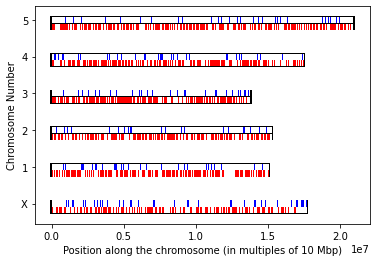

In [16]:
fig = pyplot.figure()
ax = fig.add_subplot(111)

#Define the edges and staring/ending points of the chromosomes along with their sizes
yticklabels = []
yticks = []
yranges = [[20,5],[40,5],[60,5],[80,5],[100,5],[120,5],[140,5],[160,5],[180,5],[200,5],[220,5],[240,5]]
yranges2 = [[18,9],[38,9],[58,9],[78,9],[98,9],[118,9],[138,9],[158,9],[178,9],[198,9],[218,9],[238,9]]
yranges3 = [[25.5,5],[55.5,5],[85.5,5],[115.5,5],[145.5,5],[175.5,5],[140,5],[160,5],[180,5],[200,5],[220,5],[240,5]]
yranges4 = [[31,5],[61,5],[91,5],[121,5],[151,5],[181,5],[140,5],[160,5],[180,5],[200,5],[220,5],[240,5]]
yranges5 = [[20,5],[50,5],[80,5],[110,5],[140,5],[170,5],[140,5],[160,5],[180,5],[200,5],[220,5],[240,5]]
beginner = (-100000,100000)
edge = [(17718942,100000), (15072434,100000),(15279421,100000),(13783801,100000), (17493829,100000), (20924180,100000), (17718942,100000), (15072434,100000),(15279421,100000),(13783801,100000), (17493829,100000), (20924180,100000)]
lengths = [(0,17718942), (0,15072434), (0,15279421),(0,13783801),(0,17493829),(0,20924180), (0,10000000), (0,15072434), (0,15279421),(0,13783801),(0,17493829),(0,20924180)]
bottoms = [19.5, 39.5, 59.5, 79.5, 99.5, 119.5, 139.5, 159.5, 179.5, 199.5, 219.5, 239.5]
bottoms2 = [19.5, 49.5, 79.5, 109.5, 139.5, 169.5, 199.5, 159.5, 179.5, 199.5, 219.5, 239.5]
bottoms3 = [25,55,85,115,145,175, 205, 165, 185, 205, 225, 245]
bottoms4 = [30.5,60.5,90.5,120.5,150.5,180.5, 210.5, 165, 185, 205, 225, 245]
tops = [25,45,65,85,105,125, 145, 165, 185, 205, 225, 245]
tops2 = [25,55,85,115,145,175, 145, 165, 185, 205, 225, 245]
tops3 = [30.5,60.5,90.5,120.5,150.5,180.5, 210.5, 165, 185, 205, 225, 245]
tops4 = [36,66,96,126,156,186, 216, 165, 185, 205, 225, 245]

#Plot the data. BrokenbarHcollection (matplotlib) takes inputs in the form of [(start,length), (start, length)...] for
#both x and y.
for i in range(0,6):
    coll = BrokenBarHCollection(allgenes[i], yranges3[i], facecolor="blue", zorder= 1)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(coll)
for i in range(0,6):
    coll = BrokenBarHCollection(othergenes[i], yranges5[i], facecolor="red", zorder = 0.75)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(coll)
#for i in range(0,6):
    #coll = BrokenBarHCollection(alltransgenes[i], yranges3[i], facecolor="darkgreen", zorder = 1)#, clip_box = from_bounds(0, 20, 100000, 5))
    #ax.add_collection(coll)
#for i in range(6,12):
    #coll = BrokenBarHCollection(allgenesblue[i-6], yranges2[i], facecolor="blue", zorder= 1)#, clip_box = from_bounds(0, 20, 100000, 5))
    #ax.add_collection(coll)
#for i in range(6,12):
    #coll = BrokenBarHCollection(allgenesgreen[i-6], yranges2[i], facecolor="green", zorder= 1)#, clip_box = from_bounds(0, 20, 100000, 5))
    #ax.add_collection(coll)
    
widthbox = 0.5
heightbox = 6

'''
col2 = BrokenBarHCollection(magnified[0], [211,5], facecolor="blue", zorder = 1)
col3 = BrokenBarHCollection(magnified[1], [200,5], facecolor="red", zorder = 1)
col4 = BrokenBarHCollection(magnified[2], [205.5,5], facecolor="darkgreen", zorder = 0.5)
ax.add_collection(col2)
ax.add_collection(col3)
ax.add_collection(col4)
col9 = BrokenBarHCollection([(5000000, 30000), (6000000, 30000)], [18,21], facecolor="black")
col10 = BrokenBarHCollection([(5000000, 1030000)], [39, 0.5], facecolor="black")
col11 = BrokenBarHCollection([(5000000, 1030000)], [17.5, 0.5], facecolor="black")
ax.add_collection(col9)
ax.add_collection(col10)
ax.add_collection(col11)
'''

#This chunk plots the edges and ends of the chromosome, essentially everything in black
for i in range(0,6):
    col2 = BrokenBarHCollection([lengths[i]], [bottoms2[i],widthbox], facecolor="black")
    col3 = BrokenBarHCollection([lengths[i]], [bottoms3[i],widthbox], facecolor="black")
    #col4 = BrokenBarHCollection([lengths[i]], [bottoms4[i],widthbox], facecolor="black")
    col5 = BrokenBarHCollection([lengths[i]], [tops2[i],widthbox], facecolor="black")
    col6 = BrokenBarHCollection([lengths[i]], [tops3[i],widthbox], facecolor="black")
    #col7 = BrokenBarHCollection([lengths[i]], [tops4[i],widthbox], facecolor="black")
    col8 = BrokenBarHCollection([beginner,edge[i]], [bottoms2[i],heightbox], facecolor="black")
    col9 = BrokenBarHCollection([beginner,edge[i]], [bottoms3[i],heightbox], facecolor="black")
    #col10 = BrokenBarHCollection([beginner,edge[i]], [bottoms4[i],heightbox], facecolor="black")
    center = bottoms2[i]+8.5
    yticks.append(center)
    ax.add_collection(col2)
    ax.add_collection(col3)
    #ax.add_collection(col4)
    ax.add_collection(col5)
    ax.add_collection(col6)
    #ax.add_collection(col7)
    ax.add_collection(col8)
    ax.add_collection(col9)
    #ax.add_collection(col10)
    
    
    

#Sets the labels
labeler2 = ["X","1", "2", "3", "4", "5"]#, "Y"]
for a in labeler2:
    yticklabels.append(a)

#basically plots and sets some final parameters to improve viewability
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.axis('tight')
pyplot.ylabel("Chromosome Number")
pyplot.xlabel("Position along the chromosome (in multiples of 10 Mbp)")
pyplot.savefig('../C. Elegans.pdf') 
pyplot.show()